In [ ]:
import os
os.chdir("/content/drive/MyDrive/Datasets")

In [ ]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')

X = dataset[['Review']]
y = dataset['Liked']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,
                                                    random_state=2022,
                                                    stratify=y)



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 800
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 700

In [ ]:
training_sentences = X_train['Review'].tolist()
testing_sentences = X_test['Review'].tolist()
training_labels = y_train.values
testing_labels = y_test.values


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
testing_sentences[:3]

['The ambiance was incredible.',
 'Prices are very reasonable, flavors are spot on, the sauce is home made, and the slaw is not drenched in mayo.',
 'The food was excellent and service was very good.']

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           12800     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 13,233
Trainable params: 13,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
22/22 - 12s - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6928 - val_accuracy: 0.5000 - 12s/epoch - 524ms/step
Epoch 2/30
22/22 - 3s - loss: 0.6928 - accuracy: 0.5514 - val_loss: 0.6925 - val_accuracy: 0.5000 - 3s/epoch - 121ms/step
Epoch 3/30
22/22 - 1s - loss: 0.6922 - accuracy: 0.5014 - val_loss: 0.6922 - val_accuracy: 0.5000 - 1s/epoch - 55ms/step
Epoch 4/30
22/22 - 2s - loss: 0.6916 - accuracy: 0.5871 - val_loss: 0.6917 - val_accuracy: 0.6100 - 2s/epoch - 72ms/step
Epoch 5/30
22/22 - 1s - loss: 0.6909 - accuracy: 0.5657 - val_loss: 0.6910 - val_accuracy: 0.5167 - 841ms/epoch - 38ms/step
Epoch 6/30
22/22 - 0s - loss: 0.6895 - accuracy: 0.6629 - val_loss: 0.6901 - val_accuracy: 0.7267 - 461ms/epoch - 21ms/step
Epoch 7/30
22/22 - 1s - loss: 0.6879 - accuracy: 0.6543 - val_loss: 0.6886 - val_accuracy: 0.6033 - 892ms/epoch - 41ms/step
Epoch 8/30
22/22 - 1s - loss: 0.6848 - accuracy: 0.7414 - val_loss: 0.6860 - val_accuracy: 0.7267 - 811ms/epoch - 37ms/step
Epoch 9/30
22/22

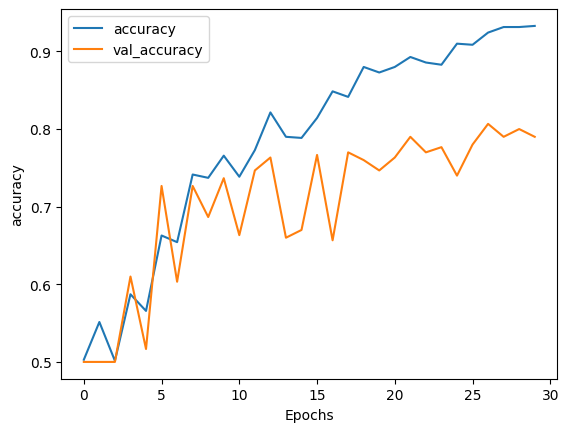

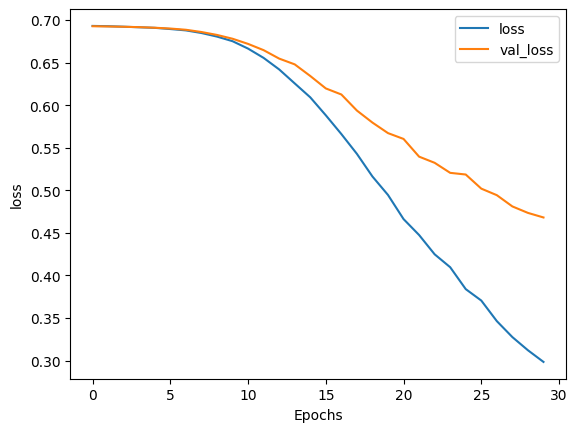

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
test_corp = ['bad taste', 'horrible','love']

In [ ]:
test_corp_sequences = tokenizer.texts_to_sequences(test_corp)
test_corp_padded = pad_sequences(test_corp_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
model.predict(test_corp_padded)

1/1 [==============================] - 0s 77ms/step


array([[0.32815754],
       [0.42519286],
       [0.74498045]], dtype=float32)

In [ ]:
np.where(model.predict(test_corp_padded)>0.5, 1, 0)

1/1 [==============================] - 0s 20ms/step


array([[0],
       [0],
       [1]])